In [83]:
import pandas as pd
import numpy as np
from numpy import array

import matplotlib.pyplot as plt

import re

In [84]:
# INPUTS:

# data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/"
data_folder_path = "/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/"

training_data_name = "tiling"

data_name = "yeast_chrV_1bpresolution_subsequence50" # csv

data_file_type = ".csv"

sequence_column_name = "sequence"

In [85]:
# cn_avg_pred_df = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv")

In [86]:
# cn_avg_pred_df

In [87]:
# cn_avg_pred_df["n=26"].std()

In [88]:
genome_df_chrV = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_predictions.csv")

In [89]:
genome_df_chrV

,n=26,n=29,n=31,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,n=29_rev_comp,n=31_rev_comp,C0
0,-0.453347,-0.627388,-0.396521,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,-0.368169,-0.418247,-0.416519
1,-0.279821,-0.653612,-0.502821,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,-0.284141,-0.262650,-0.355435
2,-0.342606,-0.448339,-0.476831,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,-0.382669,-0.338941,-0.395895
3,-0.399345,-0.442532,-0.399097,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,-0.471041,-0.345032,-0.396418
4,-0.576827,-0.525379,-0.325661,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,-0.157121,0.043354,-0.467565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,1.860281,1.425676,0.033508,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,1.507879,0.331652,1.069545
576821,1.728922,1.660969,1.013292,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,0.975800,-0.319321,1.412484
576822,0.691388,1.564713,1.412105,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,-0.089022,-0.478377,0.957592
576823,0.067896,1.451819,1.525671,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,-0.923980,-0.117385,0.631284


In [90]:
# genome_df_chrV = pd.concat([genome_df_chrV, cn_avg_pred_df], axis=1)

In [91]:
genome_df_chrV_temp = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/chrV_ir_lstm_cn_{training_data_name}_post_smoothed_matched.csv")

In [92]:
genome_df_chrV_temp

,sequence,chrID,position,n=26,n=29,n=31,C0,C0_orig,C26_raw,C29_raw,...,smooth_10.4bp_C02,smooth_10.4bp_cn_mean,smooth_10.4bp_cn_mean2,smooth_10.7bp_C26,smooth_10.7bp_C29,smooth_10.7bp_C31,smooth_10.7bp_C01,smooth_10.7bp_C02,smooth_10.7bp_cn_mean,smooth_10.7bp_cn_mean2
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,-0.453347,-0.627388,-0.396521,-0.410694,-0.069223,-0.205912,-0.781882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,-0.279821,-0.653612,-0.502821,-0.375857,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,-0.342606,-0.448339,-0.476831,-0.408462,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,-0.399345,-0.442532,-0.399097,-0.396295,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,-0.576827,-0.525379,-0.325661,-0.443712,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,1.860281,1.425676,0.033508,0.896193,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,1.728922,1.660969,1.013292,1.344338,0.771321,0.977008,0.887180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,0.691388,1.564713,1.412105,1.024366,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,0.067896,1.451819,1.525671,0.767227,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
genome_df_chrV["C26_raw"] = genome_df_chrV_temp["C26_raw"]
genome_df_chrV["C29_raw"] = genome_df_chrV_temp["C29_raw"]
genome_df_chrV["C31_raw"] = genome_df_chrV_temp["C31_raw"]

In [94]:
# genome_df_chrV_temp = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_yeast_chrV_1bpresolution_subsequence50_smoothC0_10_11_original_scale.csv")
genome_df_chrV_temp = pd.read_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_yeast_chrV_1bpresolution_subsequence50_smoothC0_10_11.csv")

In [95]:
genome_df_chrV_temp

,sequence,chrID,position,smooth_C26,smooth_C29,smooth_C31,smooth_C26_rev_comp,smooth_C29_rev_comp,smooth_C31_rev_comp,smoothC0
0,CGTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAA...,chrV,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAA...,chrV,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAG...,chrV,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CTCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGC...,chrV,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCCTCCAAGCCCTGTTGTCTCTTACCCGGATGTTCAACCAAAAGCT...,chrV,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
576820,ATGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTT...,chrV,576820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576821,TGTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTT...,chrV,576821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576822,GTAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTT...,chrV,576822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576823,TAGAAGTGCTGTAGGGCTAAAGAACAGGGTTTCATTTTCATTTTTT...,chrV,576823,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
genome_df_chrV["smooth_C26"] = genome_df_chrV_temp["smooth_C26"]
genome_df_chrV["smooth_C29"] = genome_df_chrV_temp["smooth_C29"]
genome_df_chrV["smooth_C31"] = genome_df_chrV_temp["smooth_C31"]
genome_df_chrV["smoothC0"] = genome_df_chrV_temp["smoothC0"]

In [97]:
del genome_df_chrV_temp

In [98]:
(genome_df_chrV["C26_raw"] - genome_df_chrV["C26_raw"].mean())/genome_df_chrV["C26_raw"].std()

0        -0.055918
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
576820         NaN
576821    1.674333
576822         NaN
576823         NaN
576824         NaN
Name: C26_raw, Length: 576825, dtype: float64

In [99]:
genome_df_chrV["n=26"]

0        -0.453347
1        -0.279821
2        -0.342606
3        -0.399345
4        -0.576827
            ...   
576820    1.860281
576821    1.728922
576822    0.691388
576823    0.067896
576824   -0.928453
Name: n=26, Length: 576825, dtype: float64

In [100]:
genome_df_chrV["n=26"][479208]

0.2412643520161509

In [101]:
# genome_df_chrV["C26_raw"] = (genome_df_chrV["C26_raw"] - genome_df_chrV["C26_raw"].mean())/genome_df_chrV["C26_raw"].std()*genome_df_chrV["n=26"].std()
# genome_df_chrV["C29_raw"] = (genome_df_chrV["C29_raw"] - genome_df_chrV["C29_raw"].mean())/genome_df_chrV["C29_raw"].std()*genome_df_chrV["n=29"].std()
# genome_df_chrV["C31_raw"] = (genome_df_chrV["C31_raw"] - genome_df_chrV["C31_raw"].mean())/genome_df_chrV["C31_raw"].std()*genome_df_chrV["n=31"].std()

In [102]:
genome_df_chrV["n=26_norm"] = genome_df_chrV["n=26"]
genome_df_chrV["n=29_norm"] = genome_df_chrV["n=29"]
genome_df_chrV["n=31_norm"] = genome_df_chrV["n=31"]

In [103]:
mean_C26 = -0.1702373294847514
std_C26 = 0.5761561889426974
mean_C29 = -0.1730189136679293
std_C29 = 0.5889335849536195
mean_C31 = -0.20523567238490675
std_C31 = 0.6526103123263609
genome_df_chrV["n=26"] = genome_df_chrV["n=26"]*std_C26 + mean_C26
genome_df_chrV["n=29"] = genome_df_chrV["n=29"]*std_C29 + mean_C29
genome_df_chrV["n=31"] = genome_df_chrV["n=31"]*std_C31 + mean_C31

In [104]:
print(genome_df_chrV["C26_raw"].mean(), genome_df_chrV["C29_raw"].mean(), genome_df_chrV["C31_raw"].mean())
print(genome_df_chrV["C26_raw"].std(), genome_df_chrV["C29_raw"].std(), genome_df_chrV["C31_raw"].std())

print(genome_df_chrV["n=26"].mean(), genome_df_chrV["n=29"].mean(), genome_df_chrV["n=31"].mean())
print(genome_df_chrV["n=26"].std(), genome_df_chrV["n=29"].std(), genome_df_chrV["n=31"].std())

-0.16768286628076298 -0.19501344149555852 -0.1891150998373865
0.6836696740389018 0.7229153575963156 0.6997697090882924
-0.1703518675495154 -0.1794864128012661 -0.21248951615642706
0.5153892518338811 0.5330302950581836 0.5970533562723501


In [105]:
### DNAcycP:
DNAcycP_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/chrv_1bp_cycle_norm_DNAcycP.txt", header=None)
DNAcycP_pred_chrV = array(DNAcycP_pred_chrV)
genome_df_chrV["DNAcycP_pred_chrV"] = DNAcycP_pred_chrV

In [106]:
### CycPred:
CycPred_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/cycpred_chrv_1bp.txt", header=None)
CycPred_pred_chrV_mean = CycPred_pred_chrV.mean()
CycPred_pred_chrV_std = CycPred_pred_chrV.std()
CycPred_pred_chrV = (CycPred_pred_chrV-CycPred_pred_chrV_mean)/CycPred_pred_chrV_std
CycPred_pred_chrV = array(CycPred_pred_chrV)
genome_df_chrV["CycPred_pred_chrV"] = CycPred_pred_chrV

In [107]:
### DeepBend:
DeepBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/deepbend_chrv_1bp.txt", header=None)
DeepBend_pred_chrV_mean = DeepBend_pred_chrV.mean()
DeepBend_pred_chrV_std = DeepBend_pred_chrV.std()
DeepBend_pred_chrV = (DeepBend_pred_chrV-DeepBend_pred_chrV_mean)/DeepBend_pred_chrV_std
DeepBend_pred_chrV = array(DeepBend_pred_chrV)
genome_df_chrV["DeepBend_pred_chrV"] = DeepBend_pred_chrV

In [108]:
### MIXBend:
MIXBend_pred_chrV = pd.read_csv("/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/predictions/mixbend_chrv_1bp.txt")
MIXBend_pred_chrV_mean = MIXBend_pred_chrV.mean()
MIXBend_pred_chrV_std = MIXBend_pred_chrV.std()
MIXBend_pred_chrV = (MIXBend_pred_chrV-MIXBend_pred_chrV_mean)/MIXBend_pred_chrV_std
MIXBend_pred_chrV = array(MIXBend_pred_chrV)
genome_df_chrV["MIXBend_pred_chrV"] = MIXBend_pred_chrV

In [109]:
alpha_val=0.3
alpha_val_3 = 0.5
sequence_length=200

In [110]:
starting_point=0

starting_point=9400 # High Value Problem Region
starting_point=16400 # High Value Problem Region
starting_point=18400 # High Value Problem Region
starting_point=43800 # High Value Problem Region
starting_point=51400 # High Value Problem Region
starting_point=56000 # High Value Problem Region
starting_point=61700 # High Value Problem Region
starting_point=65200 # High Value Problem Region
starting_point=77100 # High Value Problem Region
starting_point=88600 # High Value Problem Region
starting_point=95000 # High Value Problem Region
starting_point=112200 # High Value Problem Region
starting_point=113600 # High Value Problem Region
starting_point=121000 # High Value Problem Region

# starting_point=59200 # Mid Value Problem Region
# starting_point=86400 # Mid Value Problem Region REALLY INTERESTING - WHAT IS GOING ON HERE
# starting_point=94500 # Mid Value Problem Region
# starting_point=100500 # Mid Value Problem Region
# starting_point=102400 # Mid Value Problem-ish Region
# starting_point=116600 # Mid Value Problem Region

# starting_point=60900 # Low Value Problem-ish Region
# starting_point=115900 # Low Value Problem Region and SmoothC0 Too Low

# starting_point=70300 # SmoothC0 Too Low?
# starting_point=77700 # SmoothC0 Too Low?
# starting_point=104200 # SmoothC0 Too Low?



In [111]:
# Problem Region Type 1:

starting_point = 9455-55
starting_point = 16465-55
starting_point = 18522-52
# starting_point = 21286-56
starting_point = 43839-59



starting_point = 88695-55


starting_point = 545692-52

In [112]:
# Problem Region Type 2:

# starting_point = 22239-59
starting_point = 34923-53
# starting_point = 47929-59
starting_point = 50932-52


# starting_point = 474642-42

In [113]:
starting_point = 479158 # Region for Paper?
starting_point = 479208 # Region for Paper?

In [114]:
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=26", "n=29", "n=31", "n=26_rev_comp", "n=29_rev_comp", "n=31_rev_comp"]].mean(axis=1)
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=26", "n=29", "n=31", "n=29_rev_comp"]].mean(axis=1)
# genome_df_chrV["forward_rev_comp_mean"] = genome_df_chrV[["n=29", "n=29_rev_comp"]].mean(axis=1)

In [121]:
alpha_val1 = 0.3
# alpha_val1 = 1
alpha_val2 = 1

In [122]:
sequence_length=100

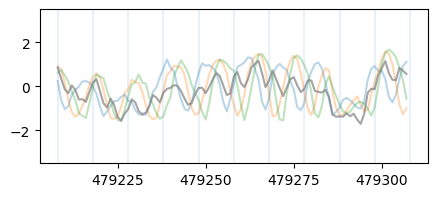

In [127]:
ylims=[-3.5, 3.5]
# ylims=[-2, 1.5]
# ylims=[-4, 4]

# plt.figure(figsize=(4,2))
# plt.figure(figsize=(4,2.5))
# plt.figure(figsize=(5,3))
# plt.figure(figsize=(6,4))
plt.figure(figsize=(5,2))


# plt.figure(figsize=(6,6))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=26_norm"][range(starting_point, starting_point + sequence_length)], label="Predicted C26", color="C0", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=29_norm"][range(starting_point, starting_point + sequence_length)], label="Predicted C29", color="C1", alpha=alpha_val1)
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["n=31_norm"][range(starting_point, starting_point + sequence_length)], label="Predicted C31", color="C2", alpha=alpha_val1)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C26"][range(starting_point, starting_point + sequence_length)], label="Smooth C26", color="C0", alpha=alpha_val2)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C29"][range(starting_point, starting_point + sequence_length)], label="Smooth C29", color="C1", alpha=alpha_val2)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smooth_C31"][range(starting_point, starting_point + sequence_length)], label="Smooth C31", color="C2", alpha=alpha_val2)


# plt.ylim(ylims)
# plt.locator_params(axis='x', nbins=5)
# plt.show()

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26_reverse"][range(starting_point, starting_point + sequence_length)], label="Predicted C26 (Reverse)", 
#          alpha=alpha_val, color="C0", linestyle="dotted")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29_reverse"][range(starting_point, starting_point + sequence_length)], label="Predicted C29 (Reverse)", 
#          alpha=alpha_val, color="C1", linestyle="dotted")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31_reverse"][range(starting_point, starting_point + sequence_length)], label="Predicted C31 (Reverse)", 
#          alpha=alpha_val, color="C2", linestyle="dotted")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C26 (Complement)", 
#          alpha=alpha_val, color="C0", linestyle="dashed")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C29 (Complement)", 
#          alpha=alpha_val, color="C1", linestyle="dashed")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C31 (Complement)", 
#          alpha=alpha_val, color="C2", linestyle="dashed")

# plt.figure(figsize=(6,6))

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=26_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C26 (Reverse Complement)", 
#          color="C0", linestyle="dashed", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=29_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C29 (Reverse Complement)", 
#          color="C1", linestyle="dashed", alpha=alpha_val1)
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["n=31_rev_comp"][range(starting_point, starting_point + sequence_length)], label="Predicted C31 (Reverse Complement)", 
#          color="C2", linestyle="dashed", alpha=alpha_val1)


# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["smoothC0"][range(starting_point, starting_point + sequence_length)], label="SmoothC0", color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["forward_rev_comp_mean"][range(starting_point, starting_point + sequence_length)], label="UnSmoothC0", alpha=alpha_val, color="C3")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["C0"][range(starting_point, starting_point + sequence_length)], label="Predicted C0", alpha=alpha_val_4)

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DNAcycP_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DNAcycP", alpha=0.7, color="C4")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["CycPred_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="CycPred", alpha=0.7, color="C5")
# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          genome_df_chrV["DeepBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="DeepBend", alpha=0.7, color="C6")
plt.plot(list(range(starting_point, starting_point + sequence_length)),
         genome_df_chrV["MIXBend_pred_chrV"][range(starting_point, starting_point + sequence_length)], label="MIXBend", alpha=0.7, color="C7")


# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C0[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C0", alpha=alpha_val_2, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C26_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C26", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C29_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C29", alpha=alpha_val_3, marker="o")
# plt.plot([list(range(starting_point, starting_point + sequence_length))[i] for i, x in enumerate(genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)]) if x is not None],
#          [x for x in genome_df_chrV.C31_raw[range(starting_point, starting_point + sequence_length)] if x is not None], label="Original C31", alpha=alpha_val_3, marker="o")

# plt.plot(list(range(starting_point, starting_point + sequence_length)),
#          ((genome_df_chrV["n=26"] + genome_df_chrV["n=31"])/2)[range(starting_point, starting_point + sequence_length)], label="Predicted C26 - C31", alpha=alpha_val, color="C4")

plt.vlines(list(range(starting_point, starting_point+sequence_length+1, 10)), ylims[0], ylims[1], alpha=0.1)
# plt.title("Predictions on ChrV, No Smoothing")
# plt.legend(fontsize=7)
plt.ylim(ylims)
plt.locator_params(axis='x', nbins=5)
plt.show()
# starting_point += sequence_length


In [142]:
genome_df_chrV["smooth_C26"][starting_point]

-0.114603196028159

In [143]:
np.mean(genome_df_chrV["n=26"])

-0.1703518675495154

In [144]:
genome_df_chrV["n=26"]

0        -0.431436
1        -0.331458
2        -0.367632
3        -0.400323
4        -0.502580
            ...   
576820    0.901575
576821    0.825892
576822    0.228110
576823   -0.131118
576824   -0.705171
Name: n=26, Length: 576825, dtype: float64

In [108]:
genome_df_chrV.columns

Index(['n=26', 'n=29', 'n=31', 'n=26_reverse', 'n=29_reverse', 'n=31_reverse',
       'n=26_comp', 'n=29_comp', 'n=31_comp', 'n=26_rev_comp', 'n=29_rev_comp',
       'n=31_rev_comp', 'C0', 'C26_raw', 'C29_raw', 'C31_raw', 'smooth_C26',
       'smooth_C29', 'smooth_C31', 'smoothC0', 'DNAcycP_pred_chrV',
       'CycPred_pred_chrV', 'DeepBend_pred_chrV', 'MIXBend_pred_chrV'],
      dtype='object')

In [105]:
genome_df_chrV

,n=26,n=29,n=31,n=26_reverse,n=29_reverse,n=31_reverse,n=26_comp,n=29_comp,n=31_comp,n=26_rev_comp,...,C29_raw,C31_raw,smooth_C26,smooth_C29,smooth_C31,smoothC0,DNAcycP_pred_chrV,CycPred_pred_chrV,DeepBend_pred_chrV,MIXBend_pred_chrV
0,-0.431436,-0.542509,-0.464009,2.035031,1.047136,-0.469321,1.863749,1.648355,0.800228,-0.525005,...,-0.781882,0.015182,NaN,NaN,NaN,NaN,-0.553745,-0.612770,-0.507917,-0.628200
1,-0.331458,-0.557953,-0.533382,2.220499,0.240150,0.077993,1.554749,2.095215,1.762567,-0.555140,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.498536,-0.666991,-0.395822,-0.551284
2,-0.367632,-0.437061,-0.516420,2.019326,-0.313433,0.935878,1.260944,2.226643,2.123617,-0.514449,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.511663,-0.596909,-0.267347,-0.567687
3,-0.400323,-0.433641,-0.465691,1.636463,-0.242350,1.518844,0.451818,2.176857,2.198343,-0.553157,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.562554,-0.685637,-0.243892,-0.541770
4,-0.502580,-0.482432,-0.417765,0.915955,0.587437,1.876456,0.118319,1.838895,2.114885,-0.742663,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.518771,-0.587462,-0.682504,-0.732316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576820,0.901575,0.666610,-0.183368,-1.020843,-1.509358,-1.959355,-1.372557,-0.701077,-1.094367,2.072896,...,NaN,NaN,NaN,NaN,NaN,NaN,1.780192,1.735511,1.230116,1.434602
576821,0.825892,0.805181,0.456049,-1.464343,-1.708619,-1.954342,-1.618316,-1.146228,-1.331187,2.071106,...,0.887180,0.505204,NaN,NaN,NaN,NaN,1.628993,1.791667,1.823612,1.758494
576822,0.228110,0.748493,0.716319,-1.717937,-1.655562,-1.890883,-1.757556,-1.490416,-1.578371,1.588807,...,NaN,NaN,NaN,NaN,NaN,NaN,1.438218,1.388571,2.028175,1.504690
576823,-0.131118,0.682006,0.790433,-1.803639,-1.486870,-1.511242,-1.684635,-1.735190,-1.765663,0.918664,...,NaN,NaN,NaN,NaN,NaN,NaN,0.774450,1.449933,1.956903,1.058348


/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:742: RuntimeWarning: invalid value encountered in scalar add
  x1 = self.convert_xunits(self._x0 + self._width)
/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/.venv/lib/python3.11/site-packages/matplotlib/patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)


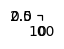

<Figure size 800x200 with 0 Axes>

In [1262]:
x = np.linspace(1, 100, 1000)
y = np.log(x)
y1 = np.sin(x)
fig = plt.figure("Line plot", figsize=(0,0))
legendFig = plt.figure("Legend plot")
ax = fig.add_subplot(111)
line1, = ax.plot(x,y, color="C0")
line2, = ax.plot(x,y, color="C1")
line3, = ax.plot(x,y, color="C2")
line4, = ax.plot(x,y, color="C0", linestyle="dashed")
line5, = ax.plot(x,y, color="C1", linestyle="dashed")
line6, = ax.plot(x,y, color="C2", linestyle="dashed")
line7, = ax.plot(x,y, color="C3")
line8, = ax.plot(x,y, color="white")
# line1, = ax.plot(x, y, c="red", lw=4, linestyle="dashdot")
# line2, = ax.plot(x, y1, c="green", lw=1, linestyle="--")
# legendFig.legend([line1, line4, line2, line5, line3, line6], 
#                  ["C26", "C26 Reverse Complement",
#                   "C29", "C29 Reverse Complement",
#                   "C31", "C31 Reverse Complement"], ncol=3)
legendFig.legend([line1, line2, line3, line4, line5, line6, line8, line7], 
                 ["C26", "C29", "C31", "C26 reverse complement", 
                 "C29 reverse complement", "C31 reverse complement", "", "SmoothC0"], ncol=3)
legendFig.set_figheight(2)
legendFig.set_figwidth(8)
legendFig.savefig('legend.png')

In [999]:
# starting_point = starting_point - (sequence_length*2)

In [859]:
# # Find Problem Region Type 1: At least one pair of Predicted Cns are not aligned over a period of a given length (one is greater than the other)
# problem_region_type1_parameter = 18
# problem_region_type1_list = []

# C26_C31_reference = (None, -1)
# for i in range(genome_df_chrV.shape[0]):
#     cur_C26_C31_diff_sign = genome_df_chrV.loc[i,"n=26"] < genome_df_chrV.loc[i, "n=31"]

#     # Check if we need to update reference:
#     if C26_C31_reference[0] != cur_C26_C31_diff_sign:
#         # Sign is different, need to update reference
#         # Was it a problem region?
#         if i - C26_C31_reference[1] >= problem_region_type1_parameter:
#             problem_region_type1_list.append((C26_C31_reference[1], i-1))
#         C26_C31_reference = (cur_C26_C31_diff_sign, i)


In [860]:
# len(problem_region_type1_list)

166

In [861]:
# total_excluded = 0
# for (l, r) in problem_region_type1_list:
#     total_excluded += r-l+1
# print(total_excluded, total_excluded/genome_df_chrV.shape[0])

5622 0.009746456897672603


In [863]:
# # Find Problem Region Type 2: SmoothC0 is consistently greater than or consistently less than all Measured Cn values over a period of a given length
# problem_region_type2_parameter = 13
# problem_region_type2_list = []

# type2_reference = (None, -1, -1)
# for i in range(genome_df_chrV.shape[0]):
#     if np.isnan(genome_df_chrV.loc[i,"C26_raw"]):
#         continue

#     cur_C26_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C26_raw"]
#     cur_C29_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C29_raw"]
#     cur_C31_diff_sign = genome_df_chrV.loc[i,"smoothC0"] < genome_df_chrV.loc[i, "C31_raw"]

#     # Check if all 3 signs are equal:
#     if (cur_C26_diff_sign == cur_C29_diff_sign) and (cur_C26_diff_sign == cur_C31_diff_sign) and (cur_C29_diff_sign == cur_C31_diff_sign):
#         # All signs are equal, now check how we need to update reference
#         if type2_reference[0] != cur_C26_diff_sign:
#             # Sign is different, need to check if it was a problem region:
#             if type2_reference[2] - type2_reference[1] >= problem_region_type2_parameter:
#                 problem_region_type2_list.append((type2_reference[1], type2_reference[2]))
#             type2_reference = (cur_C26_diff_sign, i, i)
#         else:
#             # Sign is the same, update reference to end of region:
#             type2_reference = (type2_reference[0], type2_reference[1], i)
#     else:
#         # All signs are not equal, update reference:
#         type2_reference = (None, i, i)



In [864]:
# len(problem_region_type2_list)

30

In [1237]:
# problem_region_type2_list

In [866]:
# total_excluded = 0
# for (l, r) in problem_region_type2_list:
#     total_excluded += r-l+1
# print(total_excluded, total_excluded/genome_df_chrV.shape[0])

492 0.0008529450006501105


In [ ]:
# Find Problem Region Type 3: At least one of Predicted Cns is not periodic:


In [ ]:
# for (l, r) in problem_region_type1_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [879]:
# for (l, r) in problem_region_type2_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [ ]:
# for (l, r) in problem_region_type3_list:
#     genome_df_chrV.loc[l:r, "smoothC0"] = 0

In [880]:
# genome_df_chrV.to_csv(f"/Users/Brody1/Dropbox/Northwestern/DNA_Cyclizability/data/Created/ir_lstm_cn_{training_data_name}_{data_name}_smoothC0_adj.csv", index=False)